In [3]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [4]:
# Functions with use

# Core Python

## append() --  Adds its argument as a single element to the end of a list. The length of the list increases by one.

# Pandas

# Numpy

In [5]:
#importing dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [6]:
#dataset info(MetaData)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   target                       1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [7]:
# Dimensionality Analysis
df.shape

(1000, 9)

In [8]:
# Descriptive Statistics
summary = df.describe()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,0
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [9]:
#Renaming the column names by creating a dictionary

dict = {'parental level of education': 'parent.ed',
        'test preparation course': 'Course_Project Status',
        'math score': 'GD_Score',
        'reading score': 'GPPT_Score',
        'writing score': 'MSE_Score', 
       'race/ethnicity': 'race'}

df.rename(columns=dict,inplace=True)
df

,gender,race,parent.ed,lunch,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,0
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [10]:
#Removal of unnecessary columns 
df.drop(['parent.ed', 'lunch'], axis=1, inplace=True)
df.head()

,gender,race,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target
0,female,group B,none,72,72,74,1
1,female,group C,completed,69,90,88,1
2,female,group B,none,90,95,93,1
3,male,group A,none,47,57,44,1
4,male,group C,none,76,78,75,1


In [11]:
# Checking if there is any missing/null values
df.isnull().sum()

gender                   0
race                     0
Course_Project Status    0
GD_Score                 0
GPPT_Score               0
MSE_Score                0
target                   0
dtype: int64

In [12]:
#Calculating the average score(avg_score = (GD_Score + GPPT_Score + MSE_Score)/3)
avg_score=df.mean(axis='columns')
avg_score

## Solve the error here Ishan

C:\Users\User\AppData\Local\Temp\ipykernel_20572\777573539.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_score=df.mean(axis='columns')


0      54.75
1      62.00
2      69.75
3      37.25
4      57.50
       ...  
995    70.50
996    43.00
997    48.75
998    55.75
999    62.25
Length: 1000, dtype: float64

In [13]:
#Adding a new column named Average_score and adding the avg_score values to the column
df['Average_score'] = avg_score
df.head()

,gender,race,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target,Average_score
0,female,group B,none,72,72,74,1,54.75
1,female,group C,completed,69,90,88,1,62.00
2,female,group B,none,90,95,93,1,69.75
3,male,group A,none,47,57,44,1,37.25
4,male,group C,none,76,78,75,1,57.50


In [14]:
#Counting the number of male and female
classify = df.groupby('gender').count()
classify

,race,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target,Average_score
gender,,,,,,,
female,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482


<AxesSubplot:xlabel='gender'>

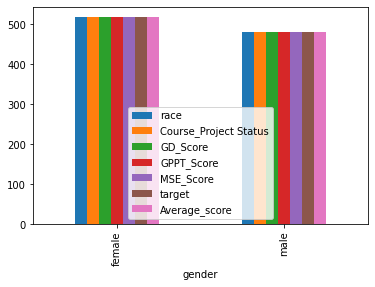

In [15]:
classify.plot.bar()

In [16]:
# hvplots

## Gender Count Plot

df.gender.value_counts().hvplot.bar(
    title="Number of people with gender", xlabel='Gender', ylabel='Count', 
    width=700, height=350
)

:Bars   [index]   (gender)

In [17]:
## Race/Ethnicity Count

df.race.value_counts().hvplot.bar(
    title="Number of people with gender", xlabel='Gender', ylabel='Count', 
    width=700, height=350
)

:Bars   [index]   (race)

In [18]:
# Grouping columns for visualization

table = df.groupby(['race', 'gender']).mean()
table.head()

GD_Score  GPPT_Score  MSE_Score    target  Average_score
race    gender                                                           
group A female  58.527778   69.000000  67.861111  0.388889      48.944444
        male    63.735849   61.735849  59.150943  0.547170      46.292453
group B female  61.403846   71.076923  70.048077  0.519231      50.762019
        male    65.930233   62.848837  60.220930  0.534884      47.383721
group C female  62.033333   71.944444  71.777778  0.505556      51.565278

In [19]:
# Plot (Edit y axis for count and not GD_Score)

table.hvplot.bar(stacked=False, height=500, rot=60)

:Bars   [race,gender]   (GD_Score)

In [24]:
# Dataset Splitting

from sklearn.model_selection import train_test_split



y = df['target']
x = df.drop(['target'], axis=1)


x_train, y_train, x_test, y_test = train_test_split(x,y, test_size=0.2,random_state=5)

In [25]:
# KNN Classification on datasets

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## knn initialization
knn = KNeighborsClassifier(n_neighbors = 5)

## Fitting knn instance on training datasets on both indices
knn.fit(x_train, y_train)

ValueError: could not convert string to float: 'male'

In [ ]:
# Cross validation

score = cross_val_score(knn, t x_train, rain, cv=10)
score.mean()y_

In [ ]:
# Prediction on y axis

pry_ed_knn = knn.predict(tes_t)
predy__knnx

In [ ]:
# Accuracy

accuracy_score(test, pred_knn)y_y_

In [ ]:
score.mean()

In [ ]:
# Hyper parameter tuning

In [ ]:
# Confusion matrix using heatmap

conf = confusion_matrix(tes_t, prey_d_knn)
plt.title('Heatmap of Confusion Matrix', fontsize=15)
sns.heatmap(conf, annot=True)
plt.show()y

In [ ]:
# Classification Report

print(classification_report(test, predy__knn))y_